In [1]:
%load_ext autoreload
%autoreload 2

In [80]:
'''
Adapted from code by Ian Osband
https://github.com/iosband/ts_tutorial/

Run experiment on extrasensory data
Policy: uniform random, posterior sampling
'''

import os
import sys
import argparse

import numpy as np
import pandas as pd
import plotnine as gg

from base.experiment import BaseExperiment
from al.env_al import ContextualBanditFunctionalContext
from al.agent_rl import PolicyGradientREINFORCE, UniformRandom
from al.env_al import normal_iid, sinewave, linear_classifier
from al.policy import PolicyNN

sys.path.append(os.getcwd())

In [92]:
##############################################################################
# Running a single experiment

true_theta = [1.0, 0.5]
n_steps = 1000
seed = 0
args = argparse.Namespace() # From https://stackoverflow.com/questions/16878315/what-is-the-right-way-to-treat-python-argparse-namespace-as-a-dictionary
args.n_feat = len(true_theta)
args.optim = 'sgd'
args.learn_rate = 1e-2
args.momentum = 0.9 # only for SGD
args.gamma = 1 # discount factor
args.sample_cost = 2 # 0 <= cost
args.in_dim = 3 # input dim of policy
args.n_act = 2 # num actions

agent = PolicyGradientREINFORCE(PolicyNN, args) #UniformRandom(n_arm)
env = ContextualBanditFunctionalContext(normal_iid, true_theta, linear_classifier)
experiment = BaseExperiment(agent, env, n_steps=n_steps,
                            seed=seed, unique_id='example')

experiment.run_experiment()

pick_action [0.21632359 0.13365279 0.06073209] tensor([[0.9456, 0.0544]]) 0
pick_action [0.14665787 0.08525519 0.02797203] tensor([[0.9746, 0.0254]]) 0
pick_action [-0.09301565 -0.01785891  0.00889109] tensor([[0.9826, 0.0174]]) 0
pick_action [-0.04246633 -0.08299646  0.00861691] tensor([[0.9907, 0.0093]]) 0
pick_action [-0.11476109 -0.03581141  0.01424666] tensor([[0.9923, 0.0077]]) 0
pick_action [-0.20118803  0.05897036  0.0421035 ] tensor([[0.9933, 0.0067]]) 0
pick_action [ 0.07687706 -0.04213276  0.00762664] tensor([[0.9948, 0.0052]]) 0
pick_action [-0.13804308 -0.05359146  0.02145742] tensor([[0.9957, 0.0043]]) 0
pick_action [-0.04707425  0.02727964  0.00295143] tensor([[0.9957, 0.0043]]) 0
pick_action [-0.11419014 -0.13109704  0.02933903] tensor([[0.9957, 0.0043]]) 0


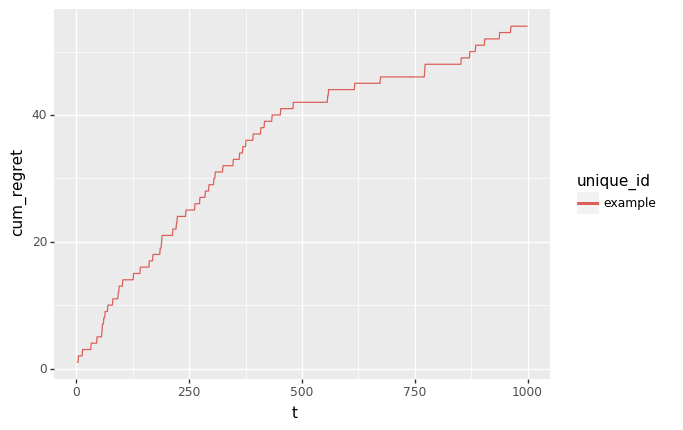

<ggplot: (-9223372029304856197)>
36 0.036


In [93]:
##############################################################################
# Simple display / plot of results

experiment.results.head()

p = (gg.ggplot(experiment.results)
     + gg.aes(x='t', y='cum_regret', colour='unique_id')
     + gg.geom_line())
print(p)

print(env.num_query, env.num_query/n_steps)

In [74]:
experiment.results

,t,instant_regret,cum_regret,action,unique_id,instant_reward,cum_reward,logger
0,1,1.0,1.0,"(1, [0.0])",example,0.0,0.0,"[0.0, 0.0]"
1,2,0.0,1.0,"(0, [1.0])",example,1.0,1.0,"[0.1708161200942459, 0.03874788745202391]"
2,3,0.0,1.0,"(1, [1.0])",example,1.0,2.0,"[0.1708161200942459, 0.03874788745202391]"
3,4,0.0,1.0,"(1, [1.0])",example,1.0,3.0,"[0.3446004684452079, -0.05219204609108057]"
4,5,1.0,2.0,"(0, [-1.0])",example,0.0,3.0,"[0.43558155840192403, -0.06668611162194406]"
...,...,...,...,...,...,...,...,...
9995,9996,0.0,141.0,"(1, [1.0])",example,1.0,9855.0,"[6.9424726177459535, 3.6678770921752286]"
9996,9997,0.0,141.0,"(1, [1.0])",example,1.0,9856.0,"[6.805109055478926, 3.5001452637194865]"
9997,9998,0.0,141.0,"(1, [-1.0])",example,1.0,9857.0,"[6.805088004930449, 3.499285093009299]"
9998,9999,0.0,141.0,"(1, [-1.0])",example,1.0,9858.0,"[6.84573904894553, 3.488383444882604]"


In [75]:
agent.w_t

array([6.87233982, 3.49872687])

In [76]:
list(agent.policy.parameters())

[Parameter containing:
 tensor([[ 0.0551,  0.0078],
         [-0.0998,  0.3322]], requires_grad=True), Parameter containing:
 tensor([-0.0904, -0.1949], requires_grad=True), Parameter containing:
 tensor([[ 0.4307, -0.5423],
         [-0.1344, -0.4986]], requires_grad=True), Parameter containing:
 tensor([-3.5189,  4.0661], requires_grad=True)]

In [56]:
a=[np.sin(2*np.pi*10*(ts-1)/1000) + np.random.normal(loc=0.0, scale=0.1) for ts in range(1000)]
a=pd.DataFrame({'x':range(1000),'y':a})
p = (gg.ggplot(a)
     + gg.aes(x='x', y='y')
     + gg.geom_line())
print(p)

In [77]:
np.append(np.array([1,2]),23)

array([ 1,  2, 23])